<a href="https://colab.research.google.com/github/AndresCMontejo/previsi-n-de-atrasos-de-vuelos/blob/main/previsi%C3%B3n_atrasos_de_vuelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**MODELO PREDICTIVO DE ATRASOS DE VUELOS**

In [261]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [262]:
datos = pd.read_csv('/content/drive/MyDrive/ETL/flights.csv')
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [263]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [264]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [265]:
datos.describe(include='O') #Caracteristicas descriptivas de las variables categoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


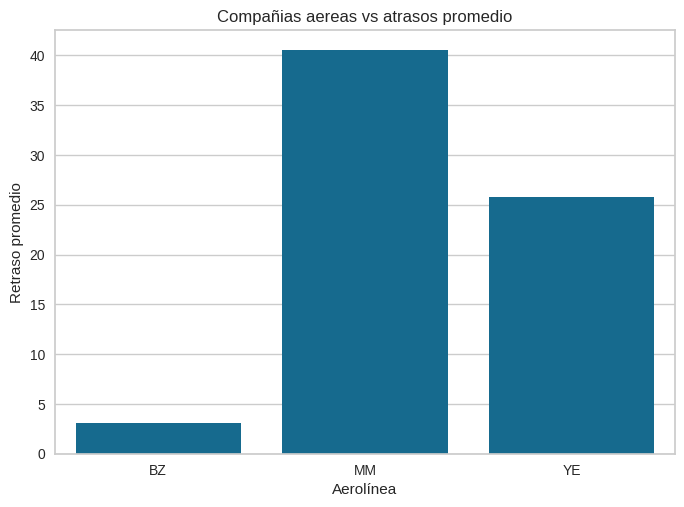

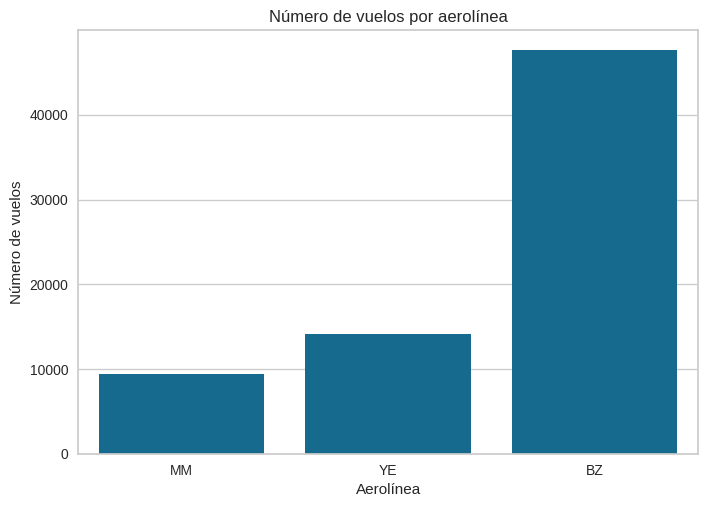

In [266]:
import matplotlib.pyplot as plt
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aereas vs atrasos promedio')
plt.xlabel('Aerolínea')
plt.ylabel('Retraso promedio')
plt.show()

#numero de vuelos por compañia
sns.countplot(x='airline', data=datos)
plt.title('Número de vuelos por aerolínea')
plt.xlabel('Aerolínea')
plt.ylabel('Número de vuelos')
plt.show()

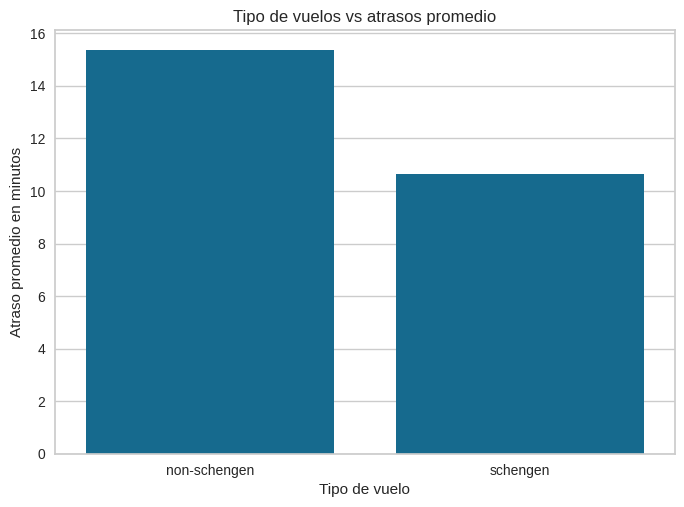

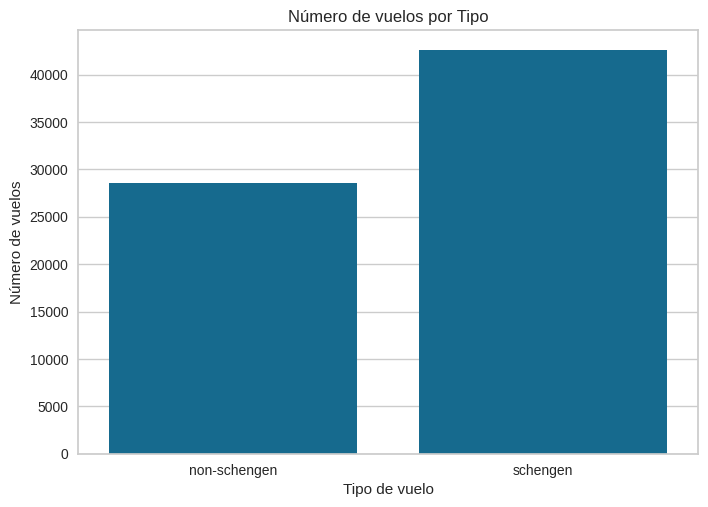

In [267]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelos vs atrasos promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

#numero de vuelos por compañia
sns.countplot(x='schengen', data=datos)
plt.title('Número de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

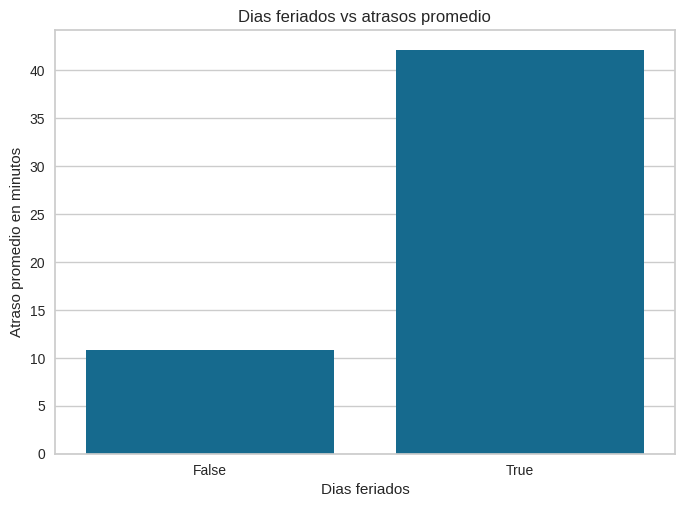

In [268]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Dias feriados vs atrasos promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

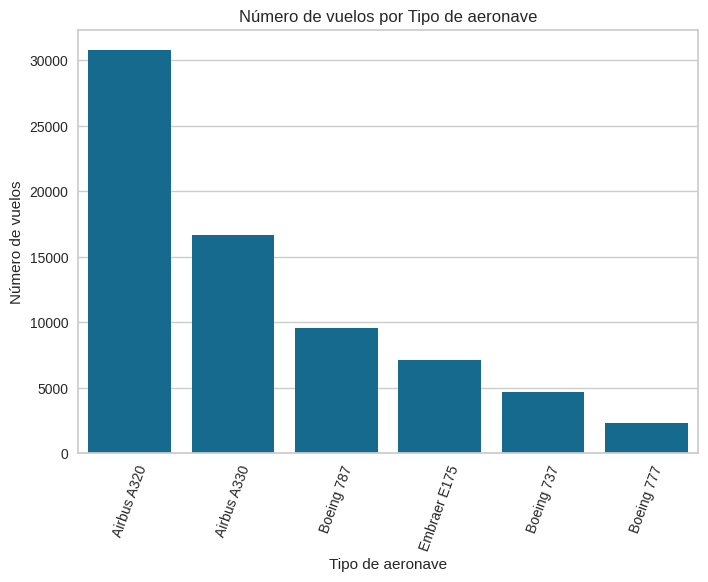

In [269]:
order = datos['aircraft_type'].value_counts().index #orden de las aeronaves
sns.countplot(x='aircraft_type', data=datos, order=order)
plt.title('Número de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

<Axes: xlabel='arrival_time', ylabel='Count'>

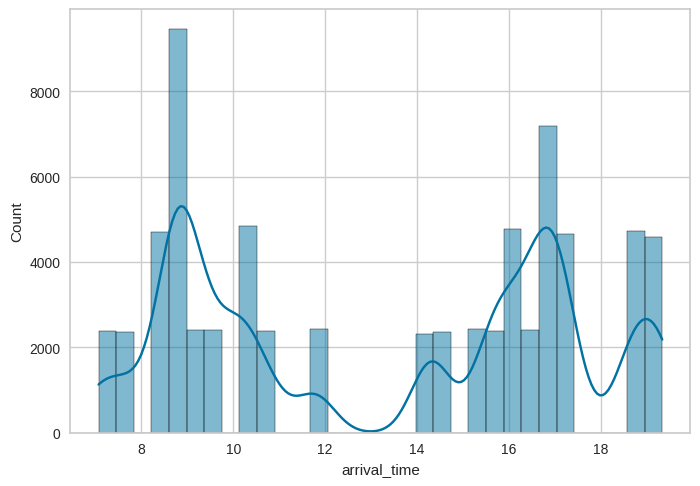

In [270]:
#DISTRIBUCIÓN DE DATOS (con histogramas)
sns.histplot(data=datos, x='arrival_time',kde=True)

In [271]:
#rango intercuartil
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2*(iqr) * np.power(len(df[columna]),-1/3)
  return ancho

<Axes: xlabel='arrival_time', ylabel='Count'>

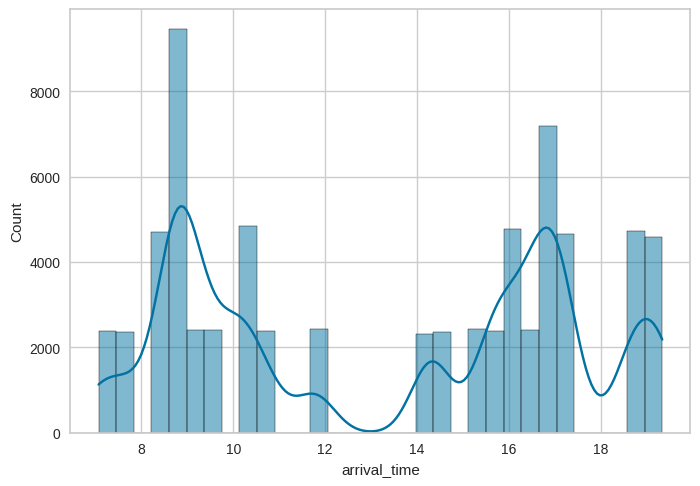

In [272]:
binwidth = ancho_bin(datos,'arrival_time')
sns.histplot(data=datos, x='arrival_time',kde=True, binwidth=binwidth)

<Axes: xlabel='arrival_time', ylabel='Count'>

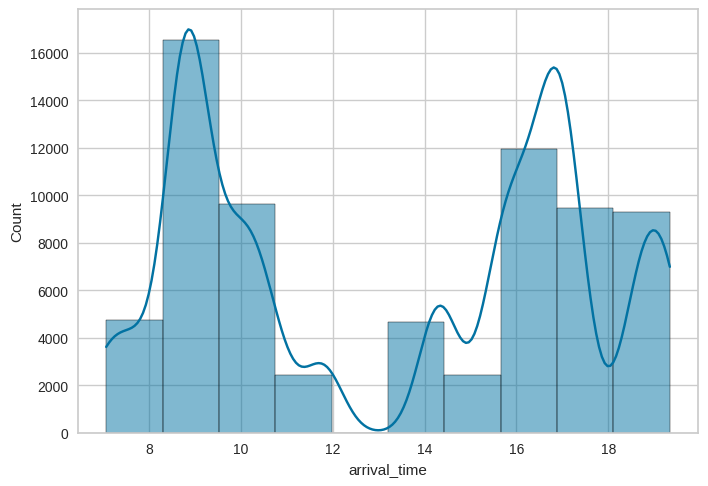

In [273]:
sns.histplot(data=datos, x='arrival_time',kde=True, bins=10)

<Axes: xlabel='departure_time', ylabel='Count'>

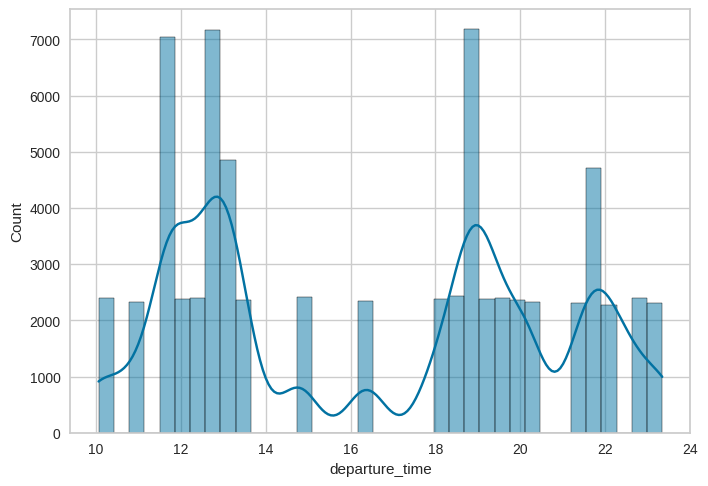

In [274]:
#Para el horario de salida
binwidth = ancho_bin(datos,'departure_time')
sns.histplot(data=datos, x='departure_time',kde=True, binwidth=binwidth)

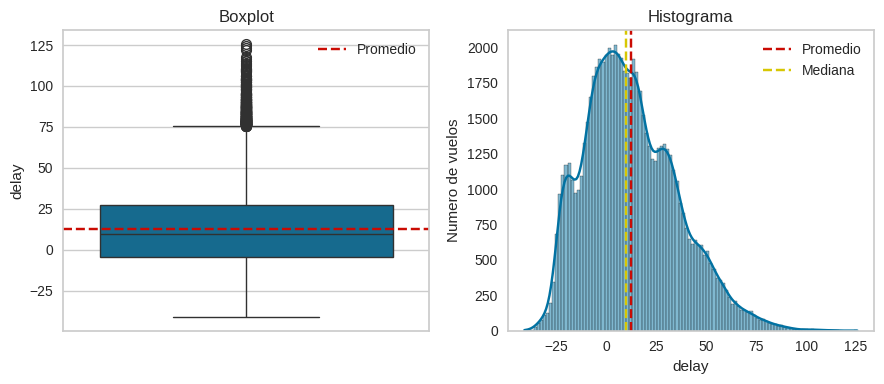

In [275]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1,2,figsize=(9,4))
sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwidth = ancho_bin(datos,'delay')
sns.histplot(data=datos, x='delay', kde=True, ax=ax[1], binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()
plt.tight_layout()
plt.show()

In [276]:
#Ingenieria de atributos
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)
datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [277]:
#generando una columna que nos indica si es fin de semana o no
datos['is_weekend'] = datos['date'].dt.weekday.isin([5,6]) #5 representa sabado y 6 domingo
datos['day_name'] = datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
15004,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,270,2012,False,-2.368061,2012-09-27,False,Thursday
41569,6,YE,Boeing 787,schengen,AUZ,17.033688,19.033688,216,2017,False,54.729607,2017-08-05,True,Saturday
34992,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,142,2016,True,80.703128,2016-05-22,True,Sunday
20134,23,YE,Embraer E175,schengen,TCY,18.801235,21.801235,247,2013,False,16.765111,2013-09-05,False,Thursday
67131,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,95,2022,False,-25.662161,2022-04-06,False,Wednesday


In [278]:
#recordar que los modelos de ML trabajan mejor cuando los valores son numericos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

In [279]:
#Para quitar advertencias:
import warnings
warnings.filterwarnings('ignore')

#sustituyendo información por datos numericos
datos['schengen'] = datos['schengen'].replace({'non-schengen':0,'schengen':1})
datos['is_holiday'] = datos['is_holiday'].replace({False:0,True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False:0,True:1})
datos.sample(3)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
9238,26,MM,Airbus A320,0,TCY,8.885071,10.885071,250,2011,1,61.909761,2011-09-08,0,Thursday
29456,11,BZ,Airbus A320,0,EMM,10.177197,13.177197,138,2015,0,-0.359559,2015-05-19,0,Tuesday
28237,10,YE,Airbus A320,0,TCY,8.939996,11.939996,57,2015,0,20.233323,2015-02-27,0,Friday


In [280]:
categoricas = ['airline','aircraft_type','origin','day_name']
datos_codificados = pd.get_dummies(data=datos,columns=categoricas,dtype=int)
datos_codificados.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [281]:
datos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [282]:
df = datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])
df.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:

In [283]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos

,onehotencoder__airline_BZ,onehotencoder__airline_MM,onehotencoder__airline_YE,onehotencoder__aircraft_type_Airbus A320,onehotencoder__aircraft_type_Airbus A330,onehotencoder__aircraft_type_Boeing 737,onehotencoder__aircraft_type_Boeing 777,onehotencoder__aircraft_type_Boeing 787,onehotencoder__aircraft_type_Embraer E175,onehotencoder__origin_AUZ,...,remainder__flight_id,remainder__schengen,remainder__arrival_time,remainder__departure_time,remainder__day,remainder__year,remainder__is_holiday,remainder__delay,remainder__date,remainder__is_weekend
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1
71171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1
71172,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7,1,8.564949,13.564949,364,2022,1,56.16708,2022-12-31,1
71173,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1


Analizando el código anterior paso a paso:

1 - from sklearn.compose import make_column_transformer

Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2 - from sklearn.preprocessing import OneHotEncoder

Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3 - categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')

Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5 - datos = one_hot_enc.fit_transform(datos)

Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6 - datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())

Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.

In [284]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
X = df.drop(columns=['delay'])
y = df['delay']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#Entrenamiento de modelo baseline
baseline = DummyRegressor()
baseline.fit(X_train,y_train)

DummyRegressor()

In [285]:
#Evaluando el modelo utilizando metricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #midiendo que tanto esta errando nuestro modelo

#predicción
y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE': round(rmse,4)**(1/2), #para que no aparezcan los minutos al cuadrado
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [286]:
resultados_baseline = calcular_regresion(y_test,y_pred_dummy)
resultados_baseline

{'RMSE': 23.16116361498273, 'MAE': 18.5646, 'R2': -0.0}

In [287]:
# bosques aleatorios
from sklearn.ensemble import RandomForestRegressor
# We already split the data in the previous cell, so we don't need to do it again here.
# from sklearn.model_selection import train_test_split

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)
ypred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test,ypred)
resultados_rf

{'RMSE': 13.747941664118306, 'MAE': 11.0262, 'R2': 0.6477}

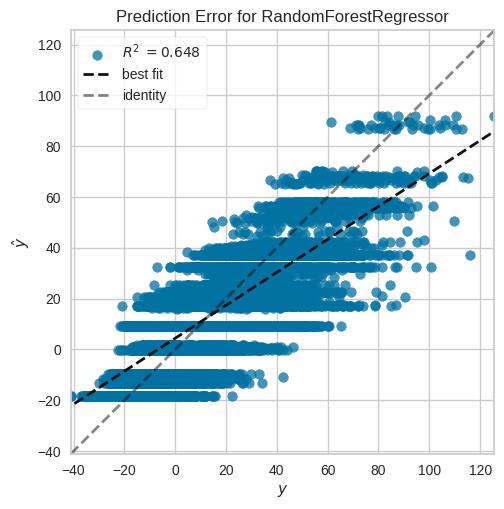

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [288]:
from yellowbrick.regressor import PredictionError
# Crear el visualizador pasando tu modelo
visualizer = PredictionError(modelo)
# Ajustar con los datos de entrenamiento
visualizer.fit(X_train, y_train)
# Evaluar con los datos de prueba
visualizer.score(X_test, y_test)
# Mostrar la gráfica
visualizer.show()


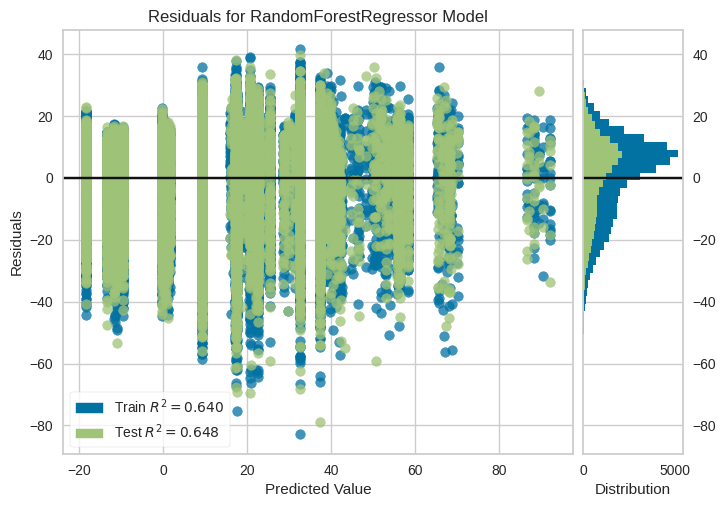

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [289]:
#analisis de residuos
from yellowbrick.regressor import ResidualsPlot
viz = ResidualsPlot(modelo)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [290]:
from sklearn.model_selection import KFold, cross_validate
scoring = {
    'RMSE' : 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2' : 'r2'
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([2.69096041, 2.65332747, 2.68098092, 4.19271517, 2.67734194]),
 'score_time': array([0.05222154, 0.06431723, 0.05072355, 0.0513463 , 0.05124044]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

In [291]:
#cantidad de atributos que tenemos
len(df.columns)

31

In [292]:
importences = modelo.feature_importances_

In [293]:
feature_importances = pd.DataFrame({'Feature':X.columns,'Importences':(importences*100).round(2)}).sort_values('Importences', ascending=False)
feature_importances

,Feature,Importences
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [294]:
resultados = pd.DataFrame(index = ['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,35)]

for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())
resultados

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
RMSE,18.83313,17.393884,15.892895,15.578527,15.156405,14.078572,13.758307,13.758652,13.758652,13.758652,...,13.747687,13.747291,13.747291,13.747291,13.747691,13.747942,13.747942,13.747942,13.747942,13.747942
MAE,14.96200,13.959300,12.876300,12.465200,12.060500,11.264800,11.041700,11.042200,11.042200,11.042200,...,11.026100,11.025900,11.025900,11.025900,11.026100,11.026200,11.026200,11.026200,11.026200,11.026200
R2,0.33880,0.436000,0.529100,0.547600,0.571800,0.630500,0.647100,0.647100,0.647100,0.647100,...,0.647700,0.647700,0.647700,0.647700,0.647700,0.647700,0.647700,0.647700,0.647700,0.647700


In [295]:
resultados = pd.DataFrame(index = ['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10,16)
for i in ct_features:
  selected_features = feature_importances['Feature'].values[:i]
  X_train_selected = X_train[selected_features]
  X_test_selected = X_test[selected_features]
  model_features.fit(X_train_selected, y_train)
  y_pred = model_features.predict(X_test_selected)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())
resultados

,10,11,12,13,14,15
RMSE,13.758652,13.756359,13.752563,13.752592,13.749651,13.749651
MAE,11.042200,11.042500,11.031200,11.031400,11.028500,11.028500
R2,0.647100,0.647200,0.647400,0.647400,0.647600,0.647600


In [296]:
selected_features = feature_importances['Feature'].values[:13]
X_selected_features = X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [297]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features,y,random_state=42)

In [298]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [2,4,6],
    'n_estimators' : [100,150,200]
}

In [299]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2',cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [300]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [301]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.230842754715212, 'MAE': 10.6296, 'R2': 0.6754}

In [302]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.758652,13.756359,13.752563,13.752592,13.749651,13.749651,13.230843
MAE,11.042200,11.042500,11.031200,11.031400,11.028500,11.028500,10.629600
R2,0.647100,0.647200,0.647400,0.647400,0.647600,0.647600,0.675400


In [303]:
import pickle
try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con éxito')
except Exception as e:
  print('Se presentó un error al almacenar el modelo', str(e))

Modelo serializado con éxito
